<h1>Прогнозирование вероятности оттока (на уровне следующего месяца) для каждого клиента фитнес-клуба

<h2>Цель проекта</h2>
*Прогнозирование оттока каждого клиента на следующий месяц<br>
*Cформировать типичные портреты клиентов и выделить несколько наиболее ярких групп<br>
*Сформулировать основные выводы и разработать рекомендации по повышению качества работы с клиентами<br>

In [61]:
import pandas as pd
import scipy.stats as stats
from scipy import stats as st
import numpy as np
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt
import plotly.express as px
from plotly import graph_objects as go
import math as mth

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans

In [63]:
try:
    gum_data = pd.read_csv('/datasets/gym_churn.csv',sep=',')
except:
    gum_data = pd.read_csv(r'C:\Users\Evgeny\Desktop\yandex.practicum\gym_project\gym_churn.csv',sep=',')

* [Шаг_1. Загрузка и просмотр данных](#Шаг_1.-Загрузка-и-просмотр-данных)
* [Шаг_1. Вывод](#Шаг_1.-Вывод)
* [Шаг_2. Исследовательский анализ данных](#Шаг_2.-Исследовательский-анализ-данных)
* [Шаг_2. Вывод](#Шаг_2.-Вывод)
* [Шаг_3. Распределение признаков](#Шаг_3.-Распределение-признаков)
* [Шаг_3. Вывод](#Шаг_3.-Вывод)
* [Шаг_4. Модель прогнозирования оттока](#Шаг_4.-Модель-прогнозирования-оттока)
* [Шаг_4. Вывод](#Шаг_4.-Вывод:)
* [Шаг_5. Модель прогнозирования оттока без коррелирующих переменных](#Шаг_5.-Модель-прогнозирования-оттока-без-коррелирующих-переменных)
* [Шаг_5. Вывод](#Шаг_5.-Вывод)
* [Шаг_6. Кластеризация клиентов](#Шаг_6.-Кластеризация-клиентов)
* [Шаг_6. Вывод](#Шаг_6.-Вывод)
* [Шаг_7. Анализ признаков по кластерам](#Шаг_7.-Анализ-признаков-по-кластерам)
* [Шаг_7. Вывод](#Шаг_7.-Вывод)
* [Общий вывод и базовые рекомендации по работе с клиентами](#Общий-вывод-и-базовые-рекомендации-по-работе-с-клиентами)

<h2>Шаг_1. Загрузка и просмотр данных</h2><br><a class="anchor" id="Шаг_1.-Загрузка-и-просмотр-данных"></a> 

<h3>Описание данных</h3>:<br>
    Данные клиента за предыдущий до проверки факта оттока месяц:<br>
        *'gender' — пол; <br>
        *'Near_Location' — проживание или работа в районе, где находится фитнес-центр;<br>
        *'Partner' — сотрудник компании-партнёра клуба;<br>
        *'Promo_friends' — факт первоначальной записи в рамках акции «приведи друга»;<br>
        *'Phone' — наличие контактного телефона;<br>
        *'Age' — возраст;<br>
        *'Lifetime' — время с момента первого обращения в фитнес-центр (в месяцах);<br>
        
   Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента:<br>
        *'Contract_period' — длительность текущего действующего абонемента;<br>
        *'Month_to_end_contract' — срок до окончания текущего действующего абонемента (в месяцах);<br>
        *'Group_visits' — факт посещения групповых занятий;<br>
        *'Avg_class_frequency_total' — средняя частота посещений в неделю за все время с начала действия абонемента;<br>
        *'Avg_class_frequency_current_month' — средняя частота посещений в неделю за предыдущий месяц;<br>
        *'Avg_additional_charges_total' — суммарная выручка от других услуг фитнес-центра;<br>

In [64]:
gum_data.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


In [65]:
gum_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
gender                               4000 non-null int64
Near_Location                        4000 non-null int64
Partner                              4000 non-null int64
Promo_friends                        4000 non-null int64
Phone                                4000 non-null int64
Contract_period                      4000 non-null int64
Group_visits                         4000 non-null int64
Age                                  4000 non-null int64
Avg_additional_charges_total         4000 non-null float64
Month_to_end_contract                4000 non-null float64
Lifetime                             4000 non-null int64
Avg_class_frequency_total            4000 non-null float64
Avg_class_frequency_current_month    4000 non-null float64
Churn                                4000 non-null int64
dtypes: float64(4), int64(10)
memory usage: 437.6 KB


In [66]:
gum_data.duplicated().sum()

0

In [67]:
gum_data['Month_to_end_contract'] = gum_data['Month_to_end_contract'].astype('int')

<font color='green'><h2>Шаг_1. Вывод</h2><br><a class="anchor" id="Шаг_1.-Вывод"></a>
 В датасете нет отсутствующих (null) значений, а также нет дублей. Все значения переведены в формат необходимый для последующей обработки данных   

<h2>Шаг_2. Исследовательский анализ данных</h2><br><a class="anchor" id="Шаг_2.-Исследовательский-анализ-данных"></a> 

In [68]:
gum_data[['Contract_period','Age','Avg_additional_charges_total','Month_to_end_contract','Lifetime','Avg_class_frequency_total','Avg_class_frequency_current_month']].describe()

,Contract_period,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,4.681250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052
std,4.549706,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906
min,1.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000
25%,1.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003
50%,1.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574
75%,6.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336
max,12.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783


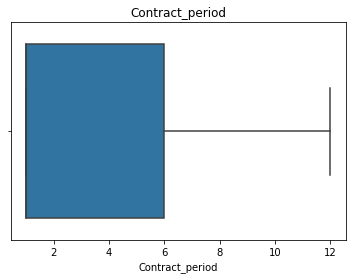

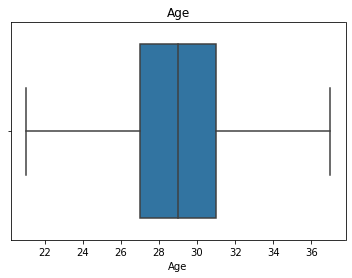

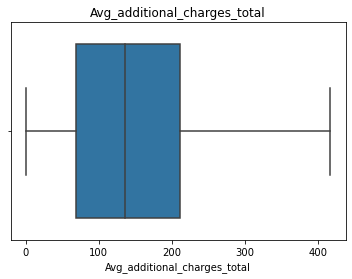

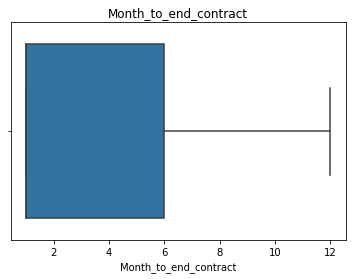

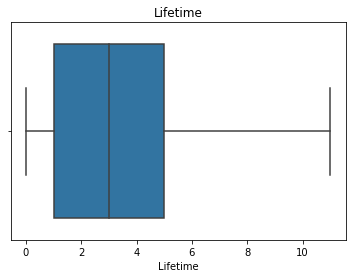

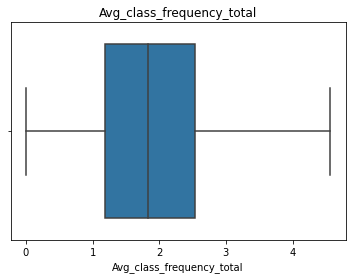

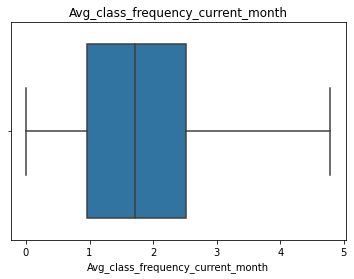

In [69]:
list_col = gum_data[['Contract_period','Age','Avg_additional_charges_total','Month_to_end_contract','Lifetime','Avg_class_frequency_total','Avg_class_frequency_current_month']]
for column in list_col:
    plt.figure()
    ax =  sns.boxplot (x= column,data=gum_data,showfliers=False)
    plt.title(column)

In [70]:
gum_data[['gender','Near_Location','Partner','Promo_friends','Phone','Group_visits']].describe()

,gender,Near_Location,Partner,Promo_friends,Phone,Group_visits
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,0.412250
std,0.499957,0.361711,0.499887,0.461932,0.295313,0.492301
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<font color='green'><h2>Шаг_2. Вывод</h2><br><a class="anchor" id="Шаг_2.-Вывод"></a>
    В данных есть как числовые переменные (возраст,длительность контракта, кол-во посещений и т.д.), так и категориальнные (пол,факт посещения групповых занятий и т.д.)<br>
    Вывод на основании числовых переменных о "среднестатистическом посетителе зала":<br>
* Длительность текущего контракта - 50% посетителей имеют контракт 1месяц. Распределение сильно смещено вправо, т.е. есть посетители с большим сроком, но,например 25% имеют абонемент от 2 до 6 месяцев.В зале много новых пользователей<br>
* Возраст - средний возраст посетителя зала = 29 лет. Переменная распределена нормально.99% посетителей описываются доверительным интервалом находятся в диапозоне +/- 3 стандартных отклонения. Как видно на boxplot - это примерно диапозон 19 - 38 лет.<br>
* суммарная выручка от других услуг - медианное значение (50% выборки) = 136 рублей с посетителя. Переменная распределена нормально.99% выручки расположено как видно на boxplot в диапозоне - от 0 до 425<br>
* lifetime - медианное значение (50% выборки) = 3 месяца.Переменная распределена нормально. Получается 50% посетителей впервые обратились в зал 3 месяца назад.Это подтверждает тот факт, что в зале много новых пользователей<br>
* Avg_class_frequency_total' и 'Avg_class_frequency_current_month' примерно совпадают по медианам 1.7 и 1.8 соответственно. Обе переменные распределены нормально. Получается, что половина пользователей ходит к нам примерно 2 раза в неделю<br>
    
Вывод на основании категориальных переменных о "среднестатистическом посетителе зала":<br>
    
* gender = 0.51 - скорее всего мужчина (если за 1 принять муж а за 0 жен)<br>
* Near_Location = 0.84 - проживает/работает в районе где находится зал<br>
* Partner = 0.48 - скорее всего НЕ сотрудник компании-партнёра клуба<br>
* Promo_friends = 0.3 - пришел НЕ в рамках акции "приведи друга"<br>
* Group_visits = 0.41 - скорее всего НЕ посещал групповые тренировки

<h2>Шаг_3. Распределение признаков</h2><br><a class="anchor" id="Шаг_3.-Распределение-признаков"></a>

<h4>числовые

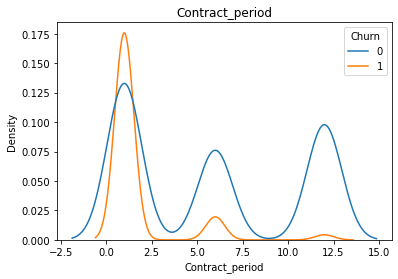

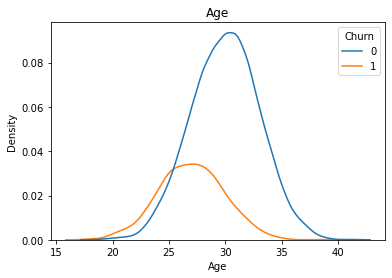

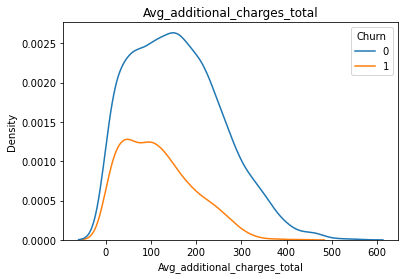

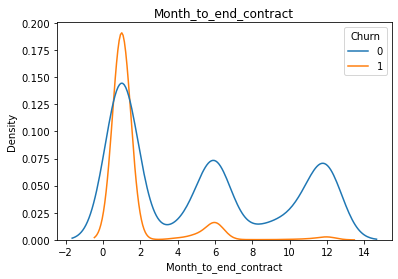

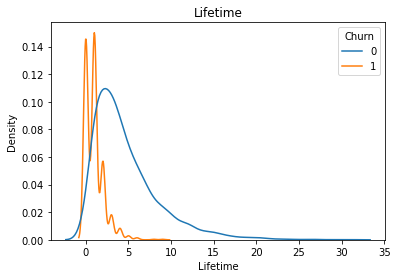

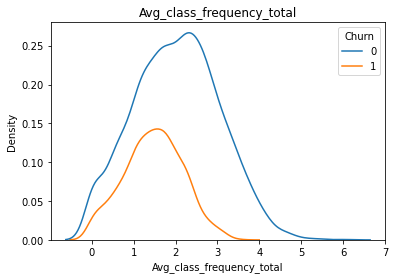

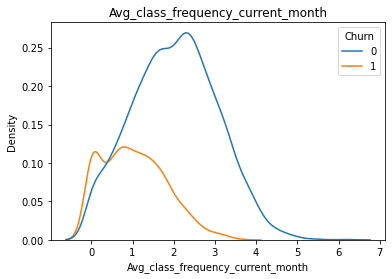

In [71]:
for column in list_col:
    plt.figure()
    figsize=(15, 6)
    sns.kdeplot(data=gum_data, x=column, hue='Churn')
    plt.title(column)

<h4>категориальные

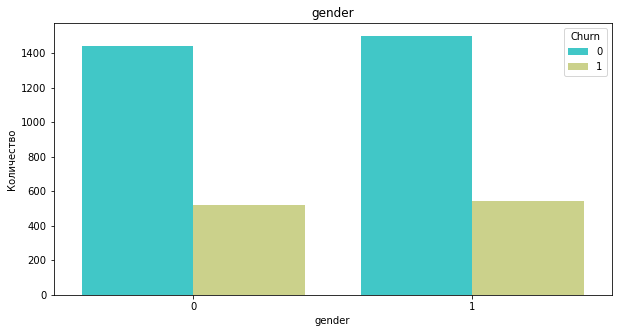

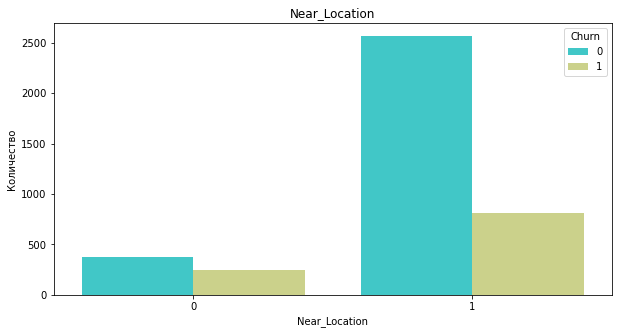

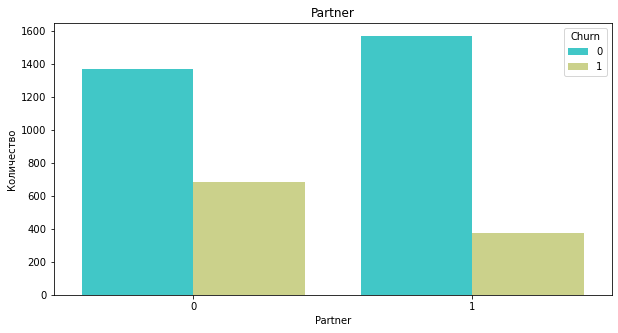

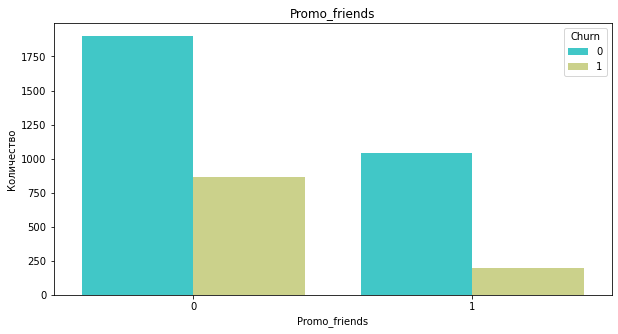

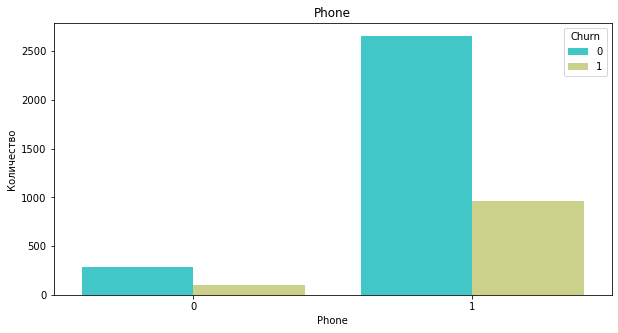

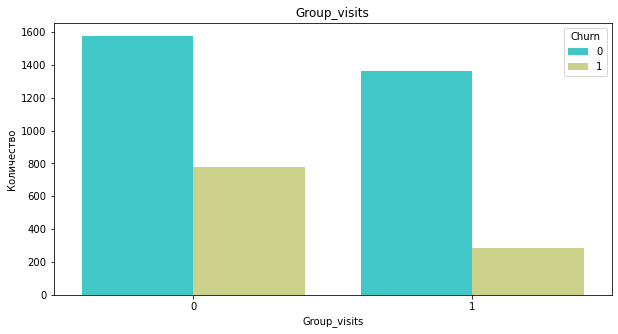

In [72]:
list_categor = (gum_data[['gender','Near_Location','Partner','Promo_friends','Phone','Group_visits']])
for colmn in list_categor:
    plt.figure(figsize=(10,5))
    sns.countplot(x=colmn,hue='Churn',data=gum_data,palette='rainbow')
    plt.ylabel('Количество')
    plt.title(colmn)
    plt.show()

<font color='green'><h2>Шаг_3. Вывод:</h2><br><a class="anchor" id="Шаг_3.-Вывод"></a>
    В данных есть как числовые переменные (возраст,длительность контракта, кол-во посещений и т.д.), так и категориальнные (пол,факт посещения групповых занятий и т.д.).<br>
Выводы по числовым переменным:<br>
* Средний возраст ушедших в отток меньше (27 vs 30);<br>
* длительность текущего действующего абонемента ушедших в отток меньше (1.7 vs 5.7);<br>
* Lifetime ушедеших в отток меньше (1 vs 4.7);<br>
* суммарная выручка от других услуг ушедеших в отток меньше (115 vs 158)<br>
Видимо в отток уходят пользователи с малым сроком договора (абонемента) и кто недавно обратился впервые к нам в зал<br>
    
Выводы по категориальным переменным:<br>
    
* Среди Churn = 0 и Churn = 1 почти одинаковая пропорция по гендеру ('gender'). Нельзя сказать, что мужчины или женщины больше склоны к оттоку<br>
* Среди тех кто живет или работает в районе нашего зала ('Near_Location') Churn = 1 т.е. отток заметно меньше, чем среди тех кто не живет и не работает в районе зала <br>
* Среди сотрудников компании-партнёра клуба '(Partner'), отток ниже<br>
* Среди тех кто приел по акции приведи друга('Promo_friends') отток ниже<br>
* Среди тех кто ходил на групповые занятия ('Group_visits') отток ниже

<h3>матрица корреляций 

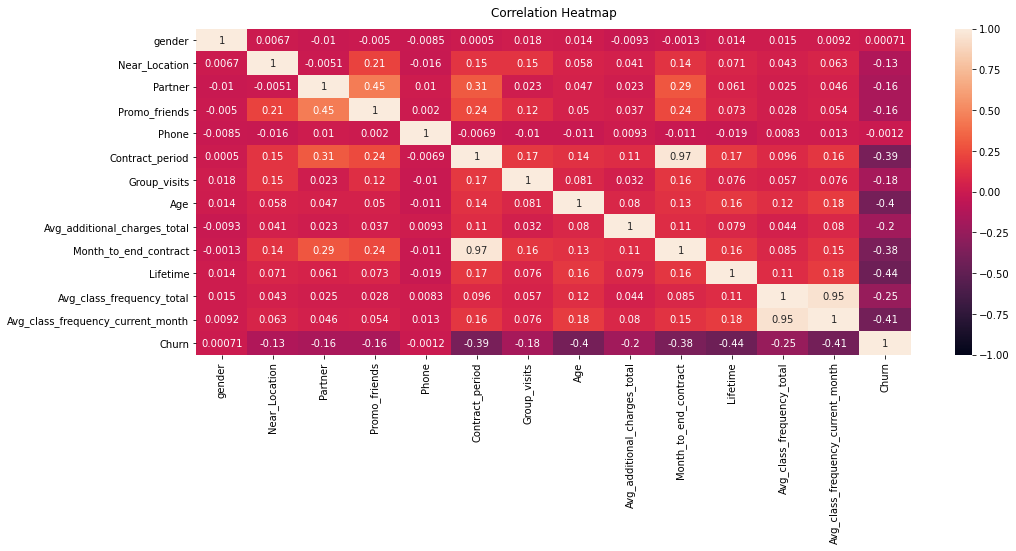

In [73]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(gum_data.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

<font color='green'><h2>Вывод:</h2><br>
На основании попарной корреляции есть переменные которые сильно коррелируют между собой и могут в дальнейшем анализе привести к проблеме мультиколлениарности :<br>
* 'Month_to_end_contract' и 'Contract_period'<br>
* 'Avg_class_frequency_current_month' и 'Avg_additional_charges_total'<br>
В рамках дальнейшего анализа проверим стоит ли убирать данные переменные из модели

<h2>Шаг_4. Модель прогнозирования оттока</h2><br><a class="anchor" id="Шаг_4.-Модель-прогнозирования-оттока"></a>

<h3>Разделение данных на обучающую и валидационную выборку 

In [74]:
# разделите данные на признаки (матрица X) и целевую переменную (y)
X = gum_data.drop('Churn', axis = 1)
y = gum_data['Churn']

In [75]:
# разделяем модель на обучающую и валидационную выборку
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [76]:
# обучим StandartScaler на обучающей выборке
scaler = StandardScaler()
scaler.fit(X_train)
# Преобразуем обучающий и валидационные наборы данных
X_train_st = scaler.transform(X_train)
X_test_st = scaler.transform(X_test)

In [77]:
models = [LogisticRegression(random_state=0),
         RandomForestClassifier(n_estimators = 100,random_state = 0)]

In [78]:
def make_prediction_lr2(m, X_train, y_train, X_test, y_test):
    model = m
    # обучим модель 
    model.fit(X_train, y_train)
    # воспользуемся уже обученной моделью, чтобы сделать прогнозы
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:,1]
    return y_test,y_pred,y_proba

In [79]:
# определим функцию, которая будет выводить наши метрики
def print_all_metrics2(y_true, y_pred, y_proba, title = 'Метрики классификации'):
    a = round((accuracy_score(y_true, y_pred)),2)
    b = round((precision_score(y_true, y_pred)),2)
    c = round((recall_score(y_true, y_pred)),2)
    d = round((f1_score(y_true, y_pred)),2)
    e = round((roc_auc_score(y_true, y_proba)),2)
    data = [a,b,c,d,e]
    names =["accuracy_score","precision_score","recall_score","f1_score","roc_auc_score"]
    df = pd.DataFrame(list(zip(data, names)),index = names)
    table = df.T.head(1)
    table['name'] = title
    return table

In [80]:
f = make_prediction_lr2(m=models[0], X_train = X_train_st, y_train = y_train, X_test=X_test_st, y_test = y_test)
tab1 = print_all_metrics2(f[0],f[1],f[2])
tab1['name'] = 'логистическая "стандартизированная"' 

C:\Users\Evgeny\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [81]:
f = make_prediction_lr2(m=models[0], X_train = X_train, y_train = y_train, X_test=X_test, y_test = y_test)
tab3 = print_all_metrics2(f[0],f[1],f[2])
tab3['name'] = 'логистическая' 

C:\Users\Evgeny\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [82]:
f = make_prediction_lr2(m=models[1], X_train = X_train_st, y_train = y_train, X_test=X_test_st, y_test = y_test)
tab2 = print_all_metrics2(f[0],f[1],f[2])
tab2['name'] = 'случайный лес  "стандартизированный"' 

In [83]:
f = make_prediction_lr2(m=models[1], X_train = X_train, y_train = y_train, X_test=X_test, y_test = y_test)
tab4 = print_all_metrics2(f[0],f[1],f[2])
tab4['name'] = 'случайный лес' 

In [84]:
table_reg_rslt = pd.concat([tab4,tab3,tab2,tab1])
table_reg_rslt

,accuracy_score,precision_score,recall_score,f1_score,roc_auc_score,name
0,0.92,0.84,0.82,0.83,0.97,случайный лес
0,0.93,0.86,0.83,0.85,0.97,логистическая
0,0.92,0.84,0.81,0.83,0.97,"случайный лес ""стандартизированный"""
0,0.92,0.85,0.83,0.84,0.97,"логистическая ""стандартизированная"""


<font color='green'><h2>Шаг_4. Вывод:</h2><br><a class="anchor" id="Шаг_4.-Вывод:"></a>
    В резульате мы имеем результаты 4 моделей прогнозирования оттока.<br>
* Все 4 модели имеют одинаковый roc_auc_score - 0.97. Этот параментр обозначает качество с которым модель выдает прогноз, чем он ближе к 1, тем лучше. Наши модели почти идеальны<br>
    Для логистической и модели случайного леса проводились сравнения по результатам с применением нормализации признаков (приведение к виду стандартного нормального распределения: значения  центрированы относительно 0, а средний разброс данных =1) и без него. Результаты нестандартизированных моделей чуть выше чем стандартизированных<br>
* По всем остальным показателям:<br>
accuracy_score (доля правильных ответов модели);<br>
precision_score (точность по прогнозированию правильных ответов только среди целевого класса - попадание в отток);<br>
recall_score (сколько реальных объектов среди целевого класса - попадание в отток удалось обнаружить);<br>
f1_score баланс между recall_score и  precision_score<br>
   логистическая нестандартизированная модель опережает все остальные модели (ближе к 1). <br>
* Далее проверим точность моделей при отсутвующих признаках выявленных с помощью корреляционной матрицы

<h2>Шаг_5. Модель прогнозирования оттока без коррелирующих переменных</h2><br><a class="anchor" id="Шаг_5.-Модель-прогнозирования-оттока-без-коррелирующих-переменных"></a>

<h4>уберем Contract_period

In [85]:
# разделите данные на признаки (матрица X) и целевую переменную (y)
X = gum_data.drop(['Churn','Contract_period'], axis = 1)
y = gum_data['Churn']

# разделяем модель на обучающую и валидационную выборку
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# обучим StandartScaler на обучающей выборке
scaler = StandardScaler()
scaler.fit(X_train)
# Преобразуем обучающий и валидационные наборы данных
X_train_st = scaler.transform(X_train)
X_test_st = scaler.transform(X_test)

<h4>логистическая

In [86]:
f = make_prediction_lr2(m=models[0], X_train = X_train_st, y_train = y_train, X_test=X_test_st, y_test = y_test)
tab5 = print_all_metrics2(f[0],f[1],f[2])
tab5['name'] = 'БЕЗ_Contract_period_логистическая "стандарт"' 

C:\Users\Evgeny\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


<h4>случайный лес

In [87]:
f = make_prediction_lr2(m=models[1], X_train = X_train_st, y_train = y_train, X_test=X_test_st, y_test = y_test)

tab6 = print_all_metrics2(f[0],f[1],f[2])
tab6['name'] = 'БЕЗ_Contract_period_случайный лес  "стандарт"' 

<h4>убираем Month_to_end_contract

In [88]:
# разделите данные на признаки (матрица X) и целевую переменную (y)
X = gum_data.drop(['Churn','Month_to_end_contract'], axis = 1)
y = gum_data['Churn']

# разделяем модель на обучающую и валидационную выборку
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# обучим StandartScaler на обучающей выборке
scaler = StandardScaler()
scaler.fit(X_train)
# Преобразуем обучающий и валидационные наборы данных
X_train_st = scaler.transform(X_train)
X_test_st = scaler.transform(X_test)

<h4>логистическая

In [89]:
f = make_prediction_lr2(m=models[0], X_train = X_train_st, y_train = y_train, X_test=X_test_st, y_test = y_test)
tab7 = print_all_metrics2(f[0],f[1],f[2])
tab7['name'] = 'БЕЗ_Month_to_end_contract_логистическая "стандартизированная"' 

C:\Users\Evgeny\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


<h4>случайный лес

In [90]:
f = make_prediction_lr2(m=models[1], X_train = X_train_st, y_train = y_train, X_test=X_test_st, y_test = y_test)

tab8 = print_all_metrics2(f[0],f[1],f[2])
tab8['name'] = 'БЕЗ_Month_to_end_contract_случайный лес  "стандартизированная"' 

In [91]:
table_reg_rslt2 = pd.concat([table_reg_rslt,tab5,tab6,tab7,tab8])

<h4>убираем Avg_class_frequency_total

In [92]:
# разделите данные на признаки (матрица X) и целевую переменную (y)
X = gum_data.drop(['Churn','Avg_class_frequency_total'], axis = 1)
y = gum_data['Churn']

# разделяем модель на обучающую и валидационную выборку
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# обучим StandartScaler на обучающей выборке
scaler = StandardScaler()
scaler.fit(X_train)
# Преобразуем обучающий и валидационные наборы данных
X_train_st = scaler.transform(X_train)
X_test_st = scaler.transform(X_test)

<h4>логистическая

In [93]:
f = make_prediction_lr2(m=models[0], X_train = X_train_st, y_train = y_train, X_test=X_test_st, y_test = y_test)
tab9 = print_all_metrics2(f[0],f[1],f[2])
tab9['name'] = 'БЕЗ_Avg_class_frequency_total_логистическая "стандартизированная"' 

C:\Users\Evgeny\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


<h4>случайный лес

In [94]:
f = make_prediction_lr2(m=models[1], X_train = X_train_st, y_train = y_train, X_test=X_test_st, y_test = y_test)
tab10 = print_all_metrics2(f[0],f[1],f[2])
tab10['name'] = 'БЕЗ_Avg_class_frequency_total_случайный лес  "стандартизированная"' 

<h4>убираем Avg_class_frequency_current_month

In [95]:
# разделите данные на признаки (матрица X) и целевую переменную (y)
X = gum_data.drop(['Churn','Avg_class_frequency_current_month'], axis = 1)
y = gum_data['Churn']

# разделяем модель на обучающую и валидационную выборку
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# обучим StandartScaler на обучающей выборке
scaler = StandardScaler()
scaler.fit(X_train)
# Преобразуем обучающий и валидационные наборы данных
X_train_st = scaler.transform(X_train)
X_test_st = scaler.transform(X_test)

<h4>логистическая

In [96]:
f = make_prediction_lr2(m=models[0], X_train = X_train_st, y_train = y_train, X_test=X_test_st, y_test = y_test)
tab11 = print_all_metrics2(f[0],f[1],f[2])
tab11['name'] = 'БЕЗ_Avg_class_frequency_current_month_логистическая "стандарт"' 

C:\Users\Evgeny\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


<h4>случайный лес

In [97]:
f = make_prediction_lr2(m=models[1], X_train = X_train_st, y_train = y_train, X_test=X_test_st, y_test = y_test)
tab12 = print_all_metrics2(f[0],f[1],f[2])
tab12['name'] = 'БЕЗ_Avg_class_frequency_current_month_случайный лес  "стандартизированная"' 

In [98]:
table_reg_rslt3 = pd.concat([table_reg_rslt2,tab9,tab10,tab11,tab12])
table_reg_rslt3['f1_score'] = table_reg_rslt3['f1_score'].astype('float')
table_reg_rslt3['roc_auc_score'] = table_reg_rslt3['roc_auc_score'].astype('float')
table_reg_rslt3['recall_score'] = table_reg_rslt3['recall_score'].astype('float')
piv_ = pd.pivot_table(table_reg_rslt3, values=['recall_score','f1_score','roc_auc_score'],index = 'name')
piv_srt = piv_.sort_values(by=['roc_auc_score','f1_score'],ascending=False)
piv_srt.style.background_gradient(cmap='Greens')

,f1_score,recall_score,roc_auc_score
name,,,
"БЕЗ_Contract_period_логистическая ""стандарт""",0.85,0.83,0.97
логистическая,0.85,0.83,0.97
"БЕЗ_Month_to_end_contract_логистическая ""стандартизированная""",0.84,0.83,0.97
"логистическая ""стандартизированная""",0.84,0.83,0.97
"БЕЗ_Contract_period_случайный лес ""стандарт""",0.83,0.82,0.97
случайный лес,0.83,0.82,0.97
"случайный лес ""стандартизированный""",0.83,0.81,0.97
"БЕЗ_Month_to_end_contract_случайный лес ""стандартизированная""",0.82,0.81,0.97
"БЕЗ_Avg_class_frequency_total_логистическая ""стандартизированная""",0.81,0.83,0.96


<font color='green'><h2>Шаг_5. Вывод</h2><br><a class="anchor" id="Шаг_5.-Вывод"></a>
Мы видим что roc_auc_score в половине моделей одинаковый = 0.97 , поэтому попробуем выбрать из моделей с данным значением наилучшую<br>
В результате recall и f1_score выше в логистической регрессии с исходными (всеми переменными) и логистическая регрессия без переменной показавшей сильнуюю коррекляцию с другой переменной Contract_period<br>
Оставим в результате модель логистической регрессии с исходными (всеми переменными) с f1_score = 0.83 и roc_auc_score = 0.97

<h2>Шаг_6. Кластеризация клиентов</h2><a class="anchor" id="Шаг_6.-Кластеризация-клиентов"></a>

In [99]:
# обучим StandartScaler на обучающей выборке
scaler = StandardScaler()
x_sc = scaler.fit_transform(gum_data.drop(columns = ['Churn'])) # обучаем нормализатор и преобразуем набор данных 
linked = linkage(x_sc, method = 'ward') 

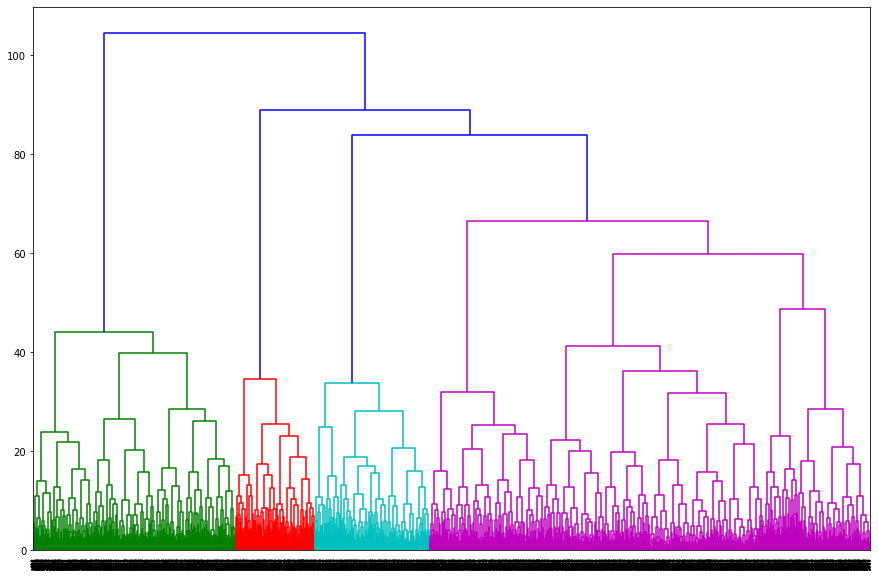

In [100]:
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.show() 
#Построение дендрограммы

<font color='green'><h2>Вывод:</h2><br>
Явно видно 5 кластеров, поэтому построим дальнейший анализ на основании 5 кластеров.

<h3>Кластеризация на основании алгоритма K-Means(n=5)

In [101]:
# задаём модель k_means с числом кластеров 5
km = KMeans(n_clusters = 5, random_state=0)

In [102]:
# прогнозируем кластеры для наблюдений (алгоритм присваивает им номера от 0 до 2)
labels = km.fit_predict(x_sc)
# сохраняем метки кластера в поле датасета
gum_data['cluster_km'] = labels
# выводим статистику по средним значениям признаков по кластеру
gum_data.groupby(['cluster_km']).mean().reset_index()

,cluster_km,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,0,0.502473,0.959446,0.783383,0.574679,1.000000,10.884273,0.543027,29.980218,160.706969,9.950544,4.738872,1.983305,1.976225,0.027695
1,1,0.522078,0.862338,0.470130,0.306494,0.000000,4.787013,0.425974,29.301299,143.957664,4.475325,3.924675,1.847220,1.716369,0.267532
2,2,0.495050,0.000000,0.463366,0.079208,1.000000,2.352475,0.215842,28.477228,135.457501,2.198020,2.809901,1.660461,1.477324,0.443564
3,3,0.485737,1.000000,0.350238,0.240095,1.000000,1.948494,0.341521,28.167987,131.622204,1.856577,2.440571,1.247634,1.012983,0.514263
4,4,0.560335,0.976105,0.356033,0.229391,0.998805,2.665472,0.473118,30.127838,161.724258,2.455197,4.896057,2.851531,2.849473,0.068100


<font color='green'><h2>Шаг_6. Вывод:</h2><br><a class="anchor" id="Шаг_6.-Вывод"></a>
K-mean разделил наших клиентов на 5 групп. Мы видим средние значения признака для каждой группы.<br>
* в группе 0 'Contract_period' (длительность текущего действующего абонемента ) всех больше, в 3 группе всех меньше<br>
* в группах 0 и 4 'Avg_additional_charges_total' (суммарная выручка от других услуг фитнес-центра) больше чем в других. Клиенты этих групп более склоны к покупкам дополнительных услуг<br>
* в группе 4 'Avg_class_frequency_current_month' (средняя частота посещений в неделю за все время с начала действия абонемента) выше чем в других группах. Представители этой группы ходят к нам чаще всего.<br>

<h2>Шаг_7. Анализ признаков по кластерам:</h2><br><a class="anchor" id="Шаг_7.-Анализ-признаков-по-кластерам"></a>

<h4>для числовых переменных

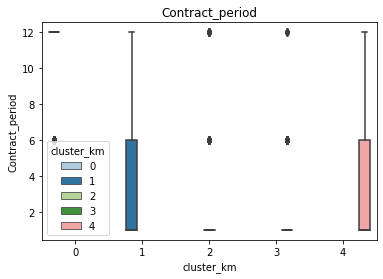

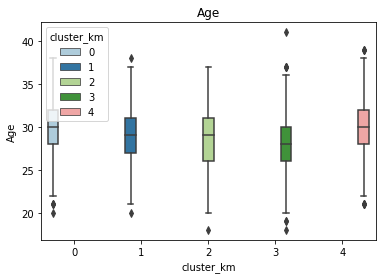

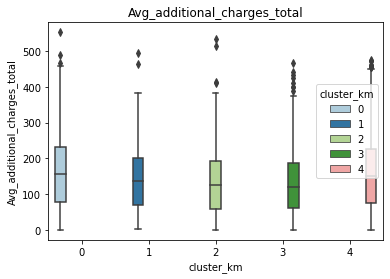

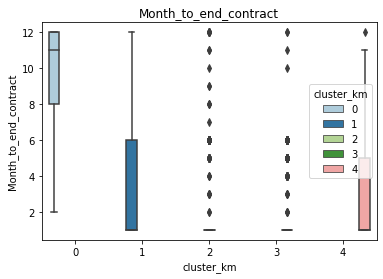

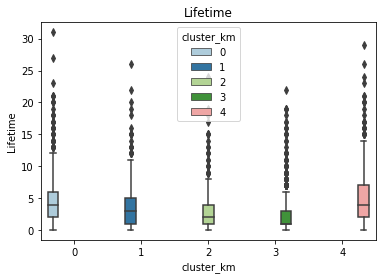

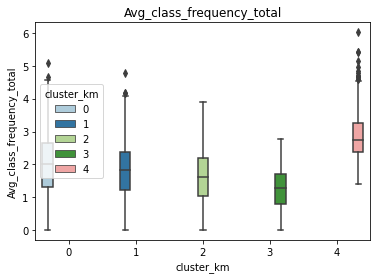

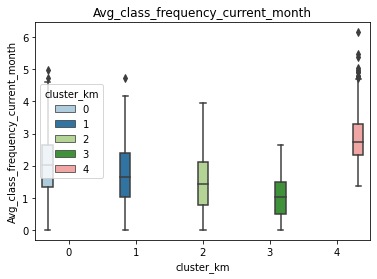

In [104]:
for column in list_col:
    plt.figure()
    figsize=(15, 12)
    sns.boxplot(data=gum_data, y=column, x ='cluster_km' ,palette = 'Paired',hue='cluster_km')
    plt.title(column)

<h4>для категориальных переменных

In [106]:
list_categor = (gum_data[['gender','Near_Location','Partner','Promo_friends','Phone','Group_visits']])

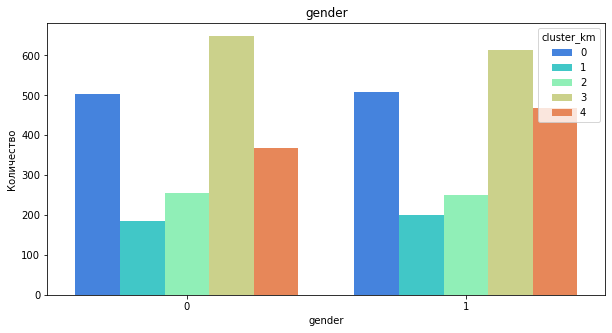

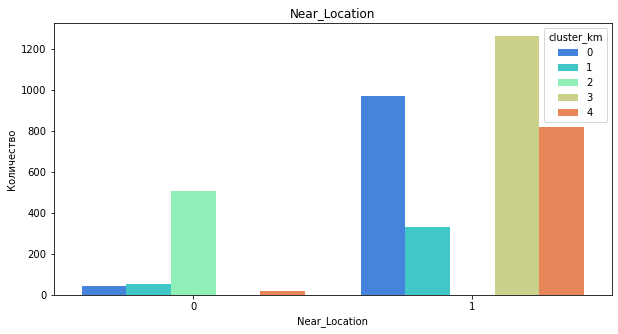

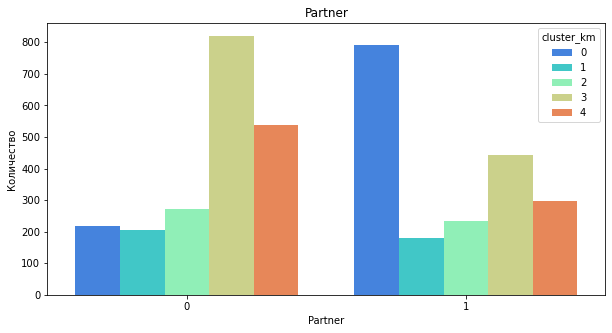

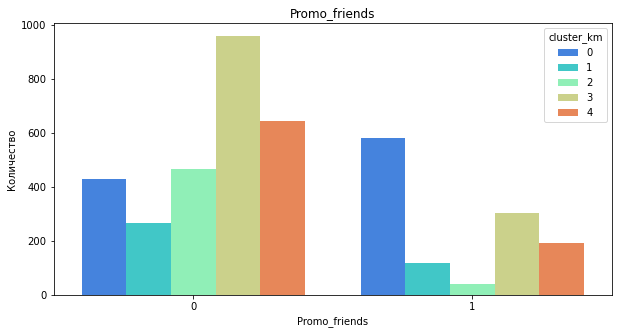

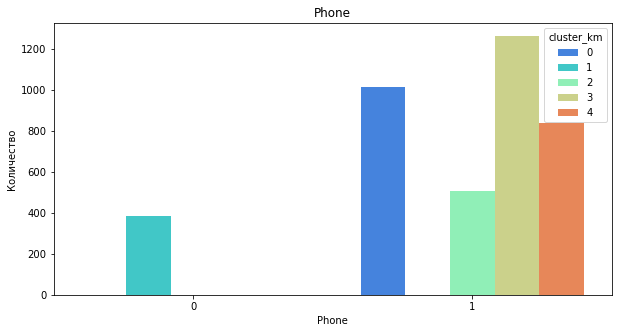

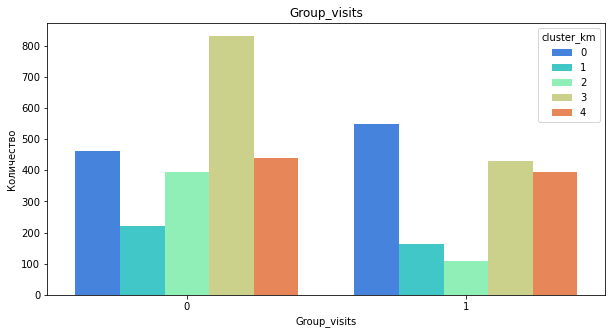

In [107]:
for colmn in list_categor:
    plt.figure(figsize=(10,5))
    sns.countplot(x=colmn,hue='cluster_km',data=gum_data,palette='rainbow')
    plt.ylabel('Количество')
    plt.title(colmn)
    plt.show()

<font color='green'><h2>Шаг 7. Вывод</h2><br><a class="anchor" id="Шаг-7.-Вывод"></a>
* 'gender' (0 - жен; 1 - муж) больше всего мужчин и больше всего женщин в 3 группе. В целом по гендерному составы группы схожи между собой, во всех группах примерно одинаковое кол-во мужчин и женщин, но в 4 группе чуть больше мужчин<br>
* 'Near_Location' (0 - не рядом с клубом; 1 - рядом ) кто живет/работает рядом с клубом во всех, кроме 2 группы больше, чем тех кто НЕ живет/работает рядом с клубом<br>
* 'Partner' (0 - не от партнера; 1 - от партнера) - больше всех кто пришел от партнера в 0 группе, больше всех кто пришел не от партнера в 3 группе<br>
* 'Promo_friends' (0 - не по приведи друга; 1- по приведи друга) - больше всех кто пришел по НЕ программе приведи друга в 3 группе, кто пришел по программе больше всех в 0 группе<br>
* 'Group_visits' (0 - не ходил на групповые ; 1 - ходил на групповые) - больше всех кто ходил на групповые в 0 группе, кто не ходил больше всех в 3 группе<br>

3 группа меньше других групп посещает групповые программы; в ней меньше всех кто пришел по программе "приведи друга" или от компании партнера". Полностью отличных от 3 группы пользователей больше всего в 0 группе. В 2 группе много тех, кто живет/работает не рядом с клубом<br>

* 0 группе большинство пользователей с годовым абонементом, тогда как в 3 группе большинство пользователей с месячным абонементом<br>
* в 3 группе посетители моложе, чем в 0 группе<br>
* в 3 группе меньше всех месяцев до конца контракта, в 0 группе больше других групп месяцев до конца контракта<br>

<h3>Доля оттока каждого кластера

In [108]:
churn_prcnt = gum_data.groupby(['cluster_km']).agg({'Churn':'mean'}).reset_index()
churn_prcnt['rcnt'] = round(churn_prcnt['Churn']*100,2)

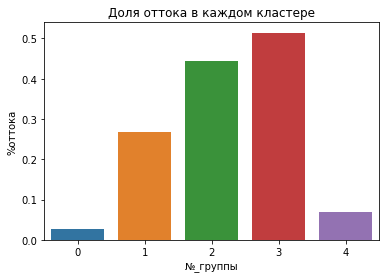

In [112]:
figsize=(15, 12)
ax = sns.barplot(x="cluster_km", y="Churn", data=churn_prcnt)
plt.ylabel("%оттока")
plt.xlabel("№_группы")
plt.title('Доля оттока в каждом кластере')
plt.show()

<font color='green'><h2>Вывод:</h2><br>
* всех больше отток в 3 группе - чуть более половины (51%), далее идет группа 2 -(44%)<br>
* отток группы 0 объяним тем, что у них самый большой срок абонемента остался, вероятно это новички зала, которые так и не сделали себе привычку ходить в зал и логично, что склонны к оттоку<br>
* отток группы 3 объясним тем, что у них меньше всех осталось срока абонемента. вероятно они рассматривают другой зал, стоит предложить им выгодное условие по продление абонемента<br>
* группа 2 похожа на группу 3, у них также осталось месяцев абонемента и они ходят в зал примерно с такой же частотой, поэтому им тоже можно предложить продлить абонемент на выгоных условиях<br>
* самая важная для нас группа 4, т.к. они больше всех тратят на доп услуги и чаще других ходят к нам в зал. отток среди них всего (7%) значит мы правильно работаем с этой группой<br>

учитывая знания из предыдущих пунктов для самой высокой к оттоку группе 3 можно предложить следующие действия<br>
1. предложить дополнительные месяц бесплатно или продление с большой скидкой - у них меньше всех месяцев до конца договора<br>
2.предложить группе беспалтные групповые занятия - это группа меньше всего ходит на них<br>

<h2>Общий вывод и базовые рекомендации по работе с клиентами</h2><br><a class="anchor" id="Общий-вывод-и-базовые-рекомендации-по-работе-с-клиентами"></a>

<h3>Общий вывод:</h3>
    В рамках работы над проектом были проделаны следующие шаги<br>
1. Исследовательский анализ данных пользователей фитнес-клуба<br>
2. Построена модель прогнозирования оттока клиентов<br>
3. Проведена кластеризация (сегментация) клиентов<br>

В рамках исследовательского анализа данных получился следующий вывод:<br>
* Средний возраст ушедших в отток меньше (27 vs 30);<br>
* длительность текущего действующего абонемента ушедших в отток меньше (1.7 vs 5.7);<br>
* Lifetime ушедеших в отток меньше (1 vs 4.7);<br>
* суммарная выручка от других услуг ушедеших в отток меньше (115 vs 158)<br>
* Среди Churn = 0 и Churn = 1 почти одинаковая пропорция по гендеру ('gender').Нельзя сказать, что мужчины или женщины больше склоны к оттоку<br>
* Среди тех кто живет или работает в районе нашего зала ('Near_Location') Churn = 1 т.е. отток заметно меньше, чем среди тех кто не живет и не работает в районе зала<br>
* Среди сотрудников компании-партнёра клуба '(Partner'), отток ниже<br>
* Среди тех кто приел по акции приведи друга('Promo_friends') отток ниже<br>
* Среди тех кто ходил на групповые занятия ('Group_visits') отток ниже<br>

<h4>Исследовательский анализ данных привел к заключению, что среди ушедших в отток преобладают посетители с малым сроком действия текущего абонемента, кто недавно (месяц назад) обратился в зал, а так же пользователи пришедшие НЕ в рамках акции "приведи друга", НЕ сотрудники компаний партнеров и проживающие/работающие НЕ в районе фитнес-клуба</h4><br>

<h4>В рамках построения модели прогнозирования оттока клиентов в следующий месяц было установленно, что наилучшие показатели по метрикам (accuracy_score; precision_score; recall_score; f1_score; roc_auc_score) имеет логистическая регрессия построенная на всех признаках (всех данных)</h4><br>

В рамках класстеризации клиентов было сформировано 5 категорий. Средние значения признаков для каждой группы оказались следующие:
* в группе 0 'Contract_period' (длительность текущего действующего абонемента ) всех больше, в 3 группе всех меньше<br>
* в группах 0 и 4 'Avg_additional_charges_total' (суммарная выручка от других услуг фитнес-центра) больше чем в других. Клиенты этих групп более склоны к покупкам дополнительных услуг<br>
* в группе 4 'Avg_class_frequency_current_month' (средняя частота посещений в неделю за все время с начала действия абонемента) выше чем в других группах. Представители этой группы ходят к нам чаще всего.<br>
По склонности к оттоку результаты в группах оказались следующие:<br>
* всех больше отток в 3 группе - чуть более половины (51%), далее идет группа 2 -(44%)<br>
<h4>В результате кластеризации было установлено:<br>
* самая важная для нас группа 4, т.к. они больше всех тратят на доп услуги и чаще других ходят к нам в зал. отток среди них всего (7%)<br>
* группа 2 похожа на группу 3, у них также осталось месяцев абонемента и они ходят в зал примерно с такой же частотой, поэтому им тоже можно предложить продлить абонемент на выгоных условиях<br>
* 3 группа меньше других групп посещает групповые программы; в ней меньше всех кто пришел по программе "приведи друга" или от компании партнера",а данная группа является самой склонной к оттоку.<br>
* Полностью отличных от 3 группы пользователей больше всего в 0 группе, а данная группа меньше всех групп склона к оттоку</h4><br>

<h3>базовые рекомендации по работе с клиентами</h3>
1.Активно развивать работу с компаниями-партнерами т.к. клиенты от них менее склоны к оттоку. Активно проводить акции в формате "приведи пользователя" т.к. отток среди тех кто пришел по такой программе меньше.<br>
2.Убрать короткие абонементы 1 - 3 месяца, оставить только абонементы на полгода. Т.к. установлено, что посетители с короткими абонементами оттекают больше, чем с длиными<br>
3.Работать на удержание посетителей у кого заканчиваются абоненменты, предлагать им заблаговременно продлевать абонемент на выгодных условиях<br>
4.Предлагать выгодные условия на продлевание абонемента тем пользователям кто пользуется доп услугами (группа 4), т.к. они приносят дополнительные деньги и нам нужно продлить их lifetime с клубом для повышения выручки<br>
5.Предлагать тем кто не ходит на групповые занятия, посетить их с доп выгодой или на индивидуальных условиях (например сделать часть платных тренировок для них бесплатными) т.к. посетители групповых тренировок менее склоны к оттоку.<br>